In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [43]:
from datetime import datetime

In [30]:
df = pd.read_csv("ctr.csv")
df.head()

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999


In [31]:
df.dtypes

Date           object
Clicks          int64
Impressions     int64
dtype: object

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date',inplace=True)

In [34]:
df.head()

,Clicks,Impressions
Date,,
2022-10-19,2851,58598
2022-10-20,2707,57628
2022-10-21,2246,50135
2022-10-22,1686,40608
2022-10-23,1808,41999


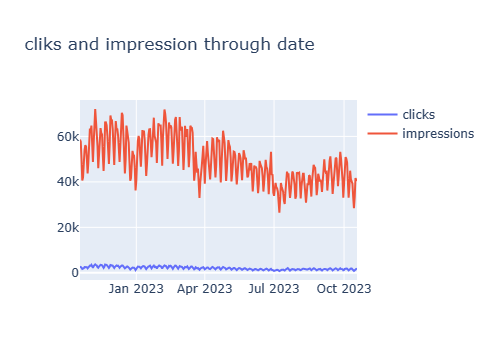

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Clicks'],mode='lines',name='clicks'))
fig.add_trace(go.Scatter(x=df.index, y=df['Impressions'],mode='lines', name='impressions'))
fig.update_layout(title='cliks and impression through date')
fig.show()

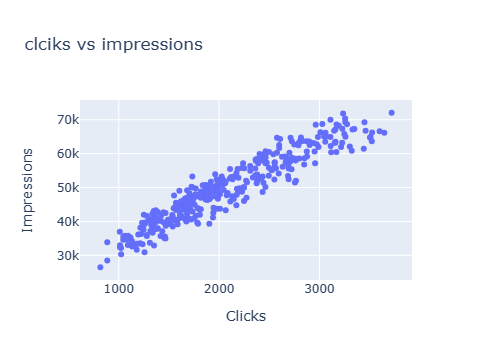

In [37]:
fig = px.scatter(df,x='Clicks',y='Impressions', title='clciks vs impressions',
                 labels={'Clicks':'clicks','Impressions':'impressions'})
fig.update_layout(xaxis_title='Clicks', yaxis_title='Impressions')
fig.show()

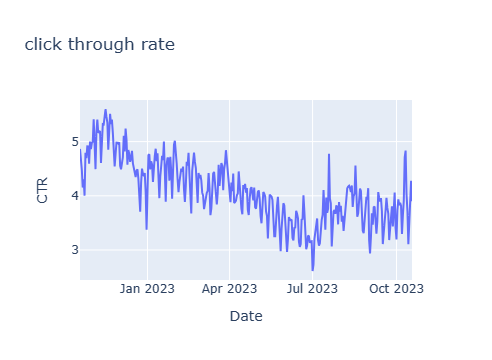

In [55]:
df['CTR']=(df['Clicks'] / df['Impressions'])*100
fig = px.line(df,x=df.index, y ='CTR', title='click through rate')
# fig.update_layout(xaxis_title = 'Date', yaxis_title='CTR')
fig.show()

In [39]:
df.head()

,Clicks,Impressions,CTR
Date,,,
2022-10-19,2851,58598,4.865354
2022-10-20,2707,57628,4.697369
2022-10-21,2246,50135,4.479904
2022-10-22,1686,40608,4.151891
2022-10-23,1808,41999,4.304864


In [45]:
df['Dayofweek']=df.index.dayofweek
df['WeekOfMonth'] = df.index.isocalendar().week

In [46]:
df.head()

,Clicks,Impressions,CTR,Dayofweek,WeekOfMonth
Date,,,,,
2022-10-19,2851,58598,4.865354,2,42
2022-10-20,2707,57628,4.697369,3,42
2022-10-21,2246,50135,4.479904,4,42
2022-10-22,1686,40608,4.151891,5,42
2022-10-23,1808,41999,4.304864,6,42


In [49]:
dayofweek_ctr = df.groupby('Dayofweek')['CTR'].mean().reset_index()


In [51]:
dayofweek_ctr

,Dayofweek,CTR
0,0,4.174384
1,1,4.274768
2,2,4.273197
3,3,4.252425
4,4,3.995702
5,5,3.688105
6,6,3.976570


In [52]:
dayofweek_ctr['Dayofweek']=['MON','TUE','WED','THU','FRI','SAT','SUN']

In [53]:
dayofweek_ctr

,Dayofweek,CTR
0,MON,4.174384
1,TUE,4.274768
2,WED,4.273197
3,THU,4.252425
4,FRI,3.995702
5,SAT,3.688105
6,SUN,3.976570


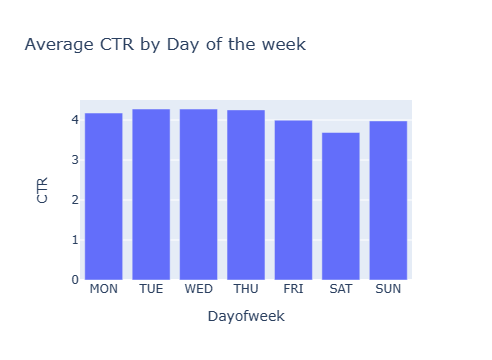

In [54]:
fig = px.bar(dayofweek_ctr, x='Dayofweek', y='CTR',
             title='Average CTR by Day of the week')
fig.show()

In [60]:
df['Daycategory']=df['Dayofweek'].apply(lambda x: 'Weekend' if x>=5 else 'Weekday')

In [61]:
df.head()

,Clicks,Impressions,CTR,Dayofweek,WeekOfMonth,Daycategory
Date,,,,,,
2022-10-19,2851,58598,4.865354,2,42,Weekday
2022-10-20,2707,57628,4.697369,3,42,Weekday
2022-10-21,2246,50135,4.479904,4,42,Weekday
2022-10-22,1686,40608,4.151891,5,42,Weekend
2022-10-23,1808,41999,4.304864,6,42,Weekend


In [63]:
daycategory_ctr=df.groupby('Daycategory')['CTR'].mean().reset_index()

In [64]:
daycategory_ctr

,Daycategory,CTR
0,Weekday,4.194398
1,Weekend,3.832338


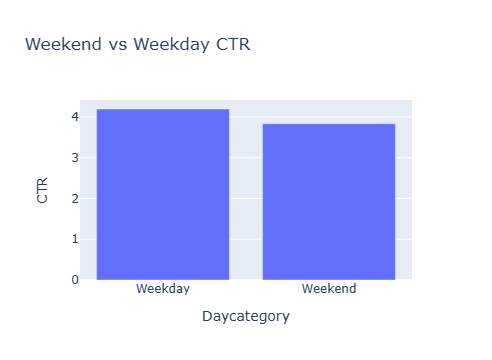

In [65]:
fig = px.bar(daycategory_ctr,x='Daycategory',y='CTR',
             title='Weekend vs Weekday CTR')
fig.show()

In [66]:
group_data = df.groupby('Daycategory')[['Clicks','Impressions']].sum().reset_index()

In [67]:
group_data

,Daycategory,Clicks,Impressions
0,Weekday,583303,13692003
1,Weekend,172383,4416639


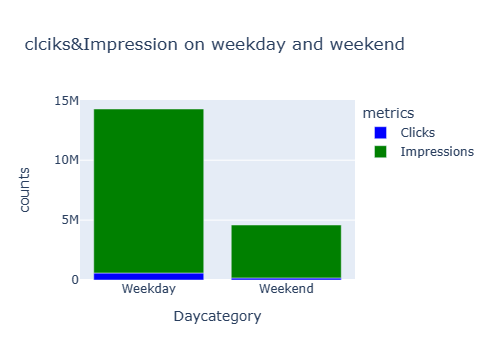

In [69]:
fig= px.bar(group_data,x='Daycategory', y=['Clicks','Impressions'],
            title='clciks&Impression on weekday and weekend',
            labels={'value':'counts','variable':'metrics'},
            color_discrete_sequence = ['blue','green'])
fig.show()

In [70]:
df.reset_index(inplace=True)

In [71]:
df.head()

,Date,Clicks,Impressions,CTR,Dayofweek,WeekOfMonth,Daycategory
0,2022-10-19,2851,58598,4.865354,2,42,Weekday
1,2022-10-20,2707,57628,4.697369,3,42,Weekday
2,2022-10-21,2246,50135,4.479904,4,42,Weekday
3,2022-10-22,1686,40608,4.151891,5,42,Weekend
4,2022-10-23,1808,41999,4.304864,6,42,Weekend


In [74]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_series = df.set_index('Date')['CTR']


In [75]:
time_series.head()

Date
2022-10-19    4.865354
2022-10-20    4.697369
2022-10-21    4.479904
2022-10-22    4.151891
2022-10-23    4.304864
Name: CTR, dtype: float64

In [76]:
differenced_series = time_series.diff().dropna()

In [77]:
differenced_series.head()

Date
2022-10-20   -0.167984
2022-10-21   -0.217465
2022-10-22   -0.328013
2022-10-23    0.152973
2022-10-24   -0.302428
Name: CTR, dtype: float64

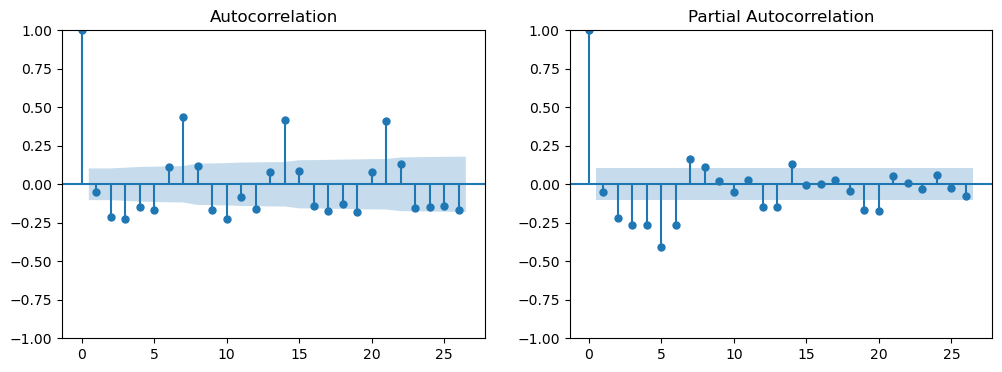

In [78]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
plot_acf(differenced_series, ax = axes[0])
plot_pacf(differenced_series, ax = axes[1])
plt.show()

In [80]:


p,d,q,s = 1,1,1,12

model=SARIMAX(time_series, order=(p,d,q), seasonal_order = (p,d,q,s))
result = model.fit()
result.summary()

C:\Users\PAVI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\PAVI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                CTR   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -71.365
Date:                            Fri, 05 Jan 2024   AIC                            152.729
Time:                                    16:08:06   BIC                            172.048
Sample:                                10-19-2022   HQIC                           160.417
                                     - 10-18-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5265      0.070      7.512      0.000       0.389       0.664
ma.L1         -0.9049      0.036    -25.356      0.000      -0.975      -0.835
ar.S.L12      -0.1573      0.071     -2.225      0.026      -0.296      -0.019
ma.S.L12      -0.9978      1.315     -0.759      0.448      -3.575       1.579
sigma2         0.0772      0.101      0.766      0.444      -0.120       0.275
===================================================================================
Ljung-Box (L1) (Q):                   5.64   Jarque-Bera (JB):                 1.20
Prob(Q):                              0.02   Prob(JB):                         0.55
Heteroskedasticity (H):               1.14   Skew:                            -0.01
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
future_steps = 100
prediction = result.predict(len(time_series),len(time_series) + future_steps - 1)
prediction

2023-10-19    3.852360
2023-10-20    3.889441
2023-10-21    3.820283
2023-10-22    3.727498
2023-10-23    3.710355
                ...   
2024-01-22    3.545539
2024-01-23    3.466612
2024-01-24    3.561157
2024-01-25    3.546665
2024-01-26    3.580087
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

In [85]:
forecast = pd.DataFrame({'Original': time_series, 'Predictions': prediction})

In [96]:
forecast.describe()

,Original,Predictions
count,365.000000,100.000000
mean,4.091236,3.657179
std,0.583254,0.095311
min,2.613395,3.455503
25%,3.677015,3.582950
50%,4.031478,3.653891
75%,4.535182,3.724395
max,5.600755,3.889441


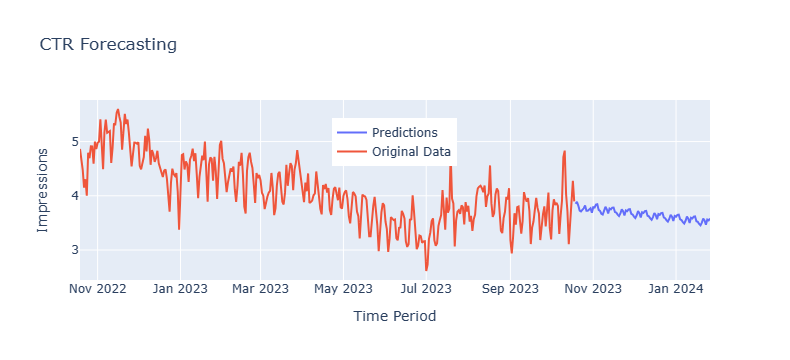

In [97]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Period',
                  yaxis_title='Impressions',
                  legend=dict(x=0.4, y=0.9),
                  showlegend=True)

fig.show()